In [10]:
%matplotlib inline 
import os,sys
import pandas as pd 
import numpy as np 
import nibabel as nb 
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import cm
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cmocean
from nilearn.image import concat_imgs, index_img
from matplotlib import colors
import seaborn as sns 
from sklearn import preprocessing

sys.path.append('/Users/kanaan/SCR/Github/GluIRON/')
from cmaps import *

ahba_dir ='/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes'
save_fig_dir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v4'

# plot striatal voxels 

In [2]:
#def plot_str_voxels():
str4d = nb.load(os.path.join(ahba_dir, 'str_concat.nii.gz')).get_data()


In [12]:
def plot_cmap(cmap, fname):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, orientation='horizontal')
    plt.tick_params(None)
    plt.savefig('%s/cmap_%s_cmap.png' %(save_fig_dir, fname), dpi = 300, transparent = True )


In [13]:
n_subjects = str4d.shape[-1]
n_voxels   = 10000 
str_voxels = []
for i in range(n_subjects):
    img = str4d[:,:,:,i].ravel()
    img[img==0] = np.nan
    img = img[~np.isnan(img)][0:n_voxels]
    str_voxels.append(img)

str_matrix = np.concatenate(str_voxels).reshape(n_voxels,n_subjects)

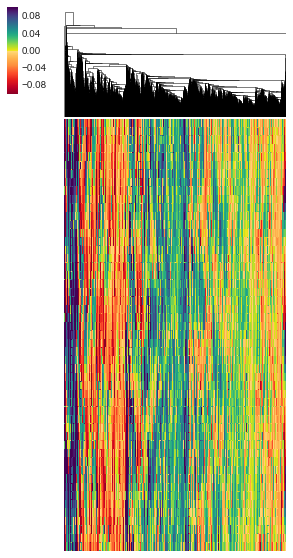

In [16]:
cg=sns.clustermap(str_matrix.T, cmap=cmap_gradient,
                  xticklabels=False, 
                  yticklabels=False, 
                  cbar=True, 
                  col_cluster=1,
                  row_cluster=0, 
                  figsize = (5,10),
                  vmin = -.1,vmax=0.1)



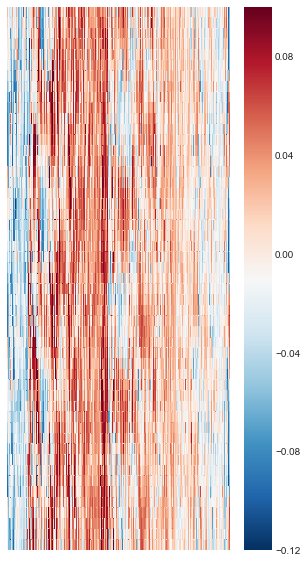

In [17]:
fig = plt.figure(figsize=(5, 10))
df_str_matrix = pd.DataFrame(str_matrix).reindex(cg.dendrogram_col.reordered_ind).T
sns.heatmap(df_str_matrix.loc[:,25:], cmap = 'RdBu_r', cbar=True, vmin = -.12, vmax =.1, 
            xticklabels=False, yticklabels=False)
plt.savefig(os.path.join(save_fig_dir, 'methods_plot_str_voxels_clust.png'), transparent= True, bbox_inches= 'tight', dpi=200)

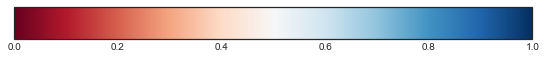

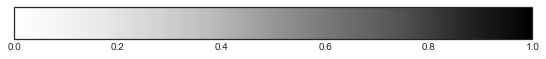

In [20]:
plot_cmap('RdBu', 'RdBu')
plot_cmap('Greys', 'Greys')

In [66]:
preprocessing.scale

<function sklearn.preprocessing.data.scale>

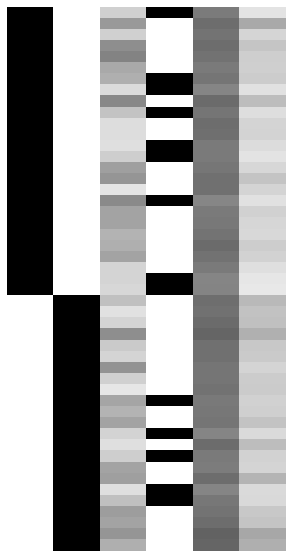

In [27]:
def plt_design_matrx():
    import seaborn as sns 
    sns.set_style('darkgrid')

    design_matrix = pd.read_csv(os.path.join(ahba_dir, 'design_twosample_CP.mat'),
                               sep='\t', skiprows=[0,1,2], header=None)
    design_matrix.columns = ['HC', 'GTS', 'Age', 'Gender', 'QI1', 'EFC']
    design_matrix.Age = design_matrix.Age/100
    design_matrix.head()

    import seaborn as sns 
    fig = plt.figure(figsize=(5, 10))
    #fig.add_subplot(111)
    #ax = plt.imshow(design_matrix, cmap='jet')
    sns.heatmap(design_matrix, cmap='Greys', cbar = 0, vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    #sns.despine(top=False)
    plt.savefig(os.path.join(save_fig_dir, 'methods_randomise_design_matrix.png'), transparent=1, bbox_inches='tight')
plt_design_matrx()

In [7]:

def plot_cmap(cmap, fname):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, orientation='horizontal')
    plt.tick_params(None)

def plot_striatum(overlay, coords):
    import nibabel as nb 
    import numpy as np
    import matplotlib.pyplot as plt 
    import matplotlib
    from matplotlib import colors
    img_underlay = np.rot90(nb.load('/usr/local/fsl/data/standard/MNI152_T1_1mm.nii.gz').get_data())
    cmap1 = matplotlib.cm.gray

    if overlay == 'tstat':
        img_overlay = np.rot90(nb.load('/users/kanaan/SCR/workspace/tmp_qsm/randomise_CP_GM_0.0_tstat1_str_mask.nii.gz').get_data())
        cmap2 = matplotlib.cm.hot
        cmap_name='hot_r'
        vmin = -2.
        vmax = +3.
    elif overlay == 'mask':
        img_overlay = np.rot90(nb.load('/users/kanaan/SCR/workspace/tmp_qsm/striatum-con-label-thr25-3sub-1mm.nii.gz').get_data())
        #cmap2 = matplotlib.cm.prism
        cmap2 = colors.ListedColormap(['lime', 'b', 'r'])
        cmap_name = 'str3'
        vmin = 1.
        vmax = 3.
    
    img_overlay[img_overlay==0] = np.nan

    fig =plt.figure()
    fig.set_size_inches(10, 10.5)
    fig.subplots_adjust(wspace=0.0000005, hspace=0.0000005, bottom = 0.1)

    ax1 = plt.subplot2grid((3,2), (0,0),  colspan = 1, rowspan =1)
    ax2 = plt.subplot2grid((3,2), (1,0),  colspan = 1, rowspan =1)
    ax3 = plt.subplot2grid((3,2), (2,0),  colspan = 1, rowspan =1)

    ax4 = plt.subplot2grid((3,2), (0,1),  colspan = 1, rowspan =1)
    ax5 = plt.subplot2grid((3,2), (1,1),  colspan = 1, rowspan =1)
    ax6 = plt.subplot2grid((3,2), (2,1),  colspan = 1, rowspan =1)

    coord1 = 86
    coord2 = 89
    coord3 = 94

    ax1.imshow(np.rot90(img_underlay[coord1,:,:]), cmap1)
    ax1.imshow(np.rot90(img_overlay[coord1,:,:]),  cmap2, vmin = vmin, vmax = vmax)
    ax2.imshow(np.rot90(img_underlay[coord2,:,:]), cmap1)
    ax2.imshow(np.rot90(img_overlay[coord2,:,:]),  cmap2, vmin = vmin, vmax = vmax)
    ax3.imshow(np.rot90(img_underlay[coord3,:,:]), cmap1)
    ax3.imshow(np.rot90(img_overlay[coord3,:,:]),  cmap2, vmin = vmin, vmax = vmax)

    coord4 = 65
    coord5 = 73
    coord6 = 80
    ax4.imshow(img_underlay[:,:,coord4], cmap1)
    ax5.imshow(img_underlay[:,:,coord5], cmap1)
    ax6.imshow(img_underlay[:,:,coord6], cmap1)
    
    ax4.imshow(img_overlay[:,:,coord4], cmap2, vmin = vmin, vmax = vmax)
    ax5.imshow(img_overlay[:,:,coord5], cmap2, vmin = vmin, vmax = vmax)
    ax6.imshow(img_overlay[:,:,coord6], cmap2, vmin = vmin, vmax = vmax)

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
        ax.set_xlim(45, 135)
        ax.set_ylim(135, 70)
        
    for ax in [ax4, ax5, ax6]:
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
        ax.set_xlim(45, 135)
        ax.set_ylim(120, 55)
    
    fig.tight_layout()
    plt.savefig('%s/methods_plot_str_%s.png' %(save_fig_dir, overlay), dpi = 300, transparent = True )
    #plot_cmap(colors.ListedColormap(['b', 'lime', 'r']), cmap_name)
    plot_cmap(cmap2, cmap_name)
    plt.savefig('%s/methods_plot_str_%s_cmap.png' %(save_fig_dir, overlay), dpi = 300, transparent = True )


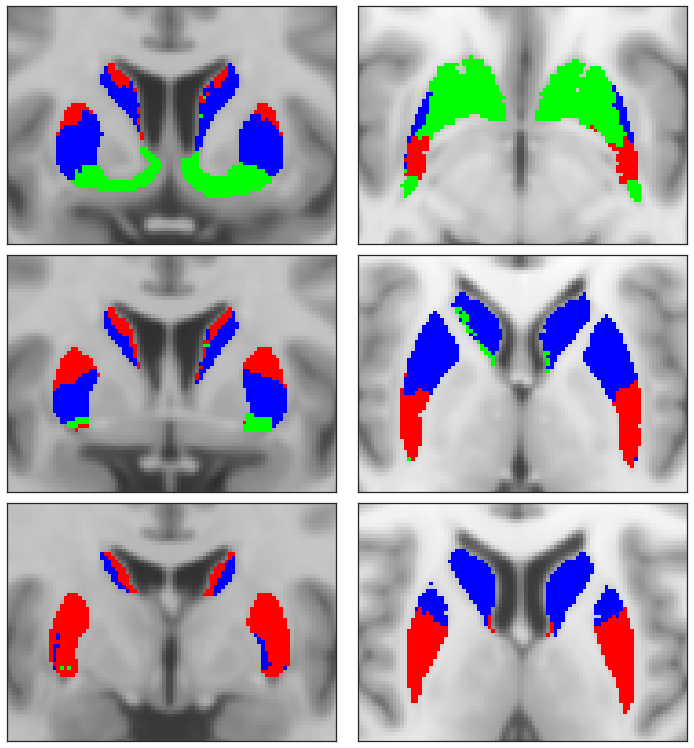

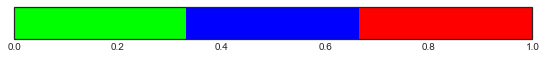

In [8]:
plot_striatum('mask', None)

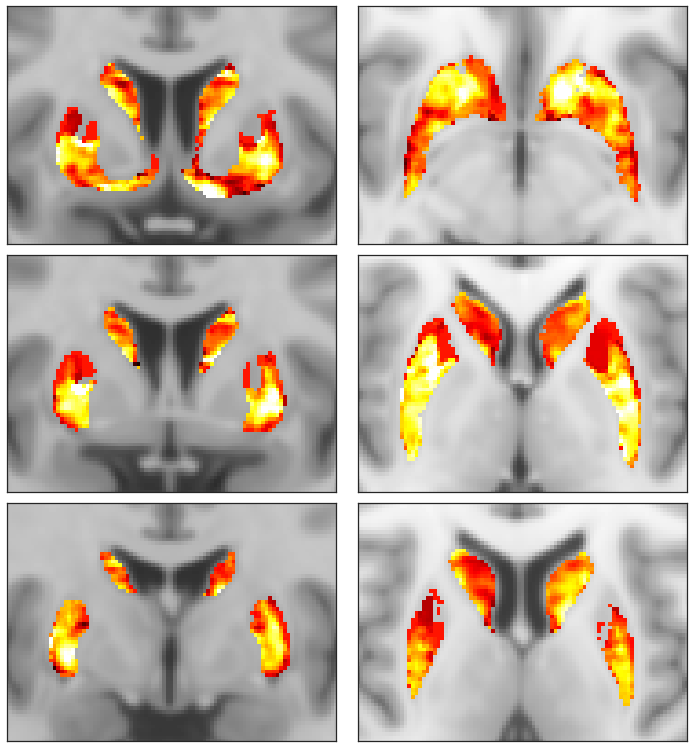

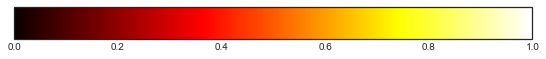

In [9]:
plot_striatum('tstat', None)

# PLOT AHBA DATA 

In [3]:

dict_ontology = { 
                    
'basal forebrain'      : '00_CTX',
'cingulate gyrus'      : '00_CTX', 
'claustrum'            : '00_CTX', 
'frontal lobe'         : '00_CTX', 
'insula'               : '00_CTX', 
'occipital lobe'       : '00_CTX', 
'parietal lobe'        : '00_CTX', 
'sulci & spaces'       : '00_CTX', 
'temporal lobe'        : '00_CTX', 
'brain'                : '00_CTX', 
'parahippocampal gyrus': '02_AMG',
'hippocampal formation': '02_AMG', 
'amygdala'             : '02_AMG', 
'striatum'             : '03_BG', 
'globus pallidus'      : '03_BG', 
'hypothalamus'         : '05_TH',
'epithalamus'          : '05_TH', 
'subthalamus'          : '05_TH', 
'ventral thalamus'     : '05_TH', 
'dorsal thalamus'      : '05_TH', 
'cerebellar cortex'    : '06_CB', 
'cerebellar nuclei'    : '06_CB', 
'basal part of pons'   : '07_P',
'pontine tegmentum'    : '07_P',
'mesencephalon'        : '08_MB', 
'myelencephalon'       : '09_WM', 
'white matter'         : '09_WM'
}
                 

In [4]:
#read data

def return_expression_df(geneset):
    ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/'
    drop_strings = ['coords_native', 'donor_names', 'struct_id', 
                'struct_name', 'top_struct', 'Mean', 'Median', 
                'PC1', 'PC2','PC3', #'SVD1g', 'SVD2g','SVD3g', 'SVD3p', 'SVD2p','SVD3p', 
                'corrected_mni_x', 'corrected_mni_y', 'corrected_mni_z']
    df = pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0)
    gs = [i for i in df.columns if i not in drop_strings]
    return df, gs 

def return_ahba_data():
    #grab data 
    ahba_dir         = '/Users/kanaan/SCR/Github/ENIGMA_TOURETTE/AHBA/ahba_data'
    AHBA = pd.read_csv(os.path.join(ahba_dir, 'AHBA_20737.csv'),index_col=0)
    META = AHBA.iloc[:,-28:]

    #add ontology
    for i in IRON_H.index:
        top_struct= IRON_H.loc[i]['top_struct']
        IRON_H.loc[i, 'STRUCT'] = dict_ontology[top_struct]

    for i in AHBA.index:
        AHBA.loc[i, 'STRUCT'] =IRON_H.loc[i]['STRUCT']
        AHBA.loc[i, 'STRUCT_CAT'] = float(AHBA.loc[i, 'STRUCT'][0:2])

    # scale

    AHBA = AHBA.sort_values(by=['STRUCT'])
    df = AHBA.iloc[:,:-32]

    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)

    return df 
    

In [14]:
#read genesets 
IRON_H,  GS_IRON_H   = return_expression_df('IRON_HOMEOSTASIS_PCA')
IRON_D,  GS_IRON_D   = return_expression_df('IRON_D_PCA')
IRON_T2, GS_IRON_T2  = return_expression_df('IRON_TRANSPORT2_PCA')
FERRITIN,GS_FERRITIN = return_expression_df('FERRITIN_PCA')
IRON_IM, GS_IRON_IM  = return_expression_df('IRON_ION_IMPORT_PCA')
IRON_T1, GS_IRON_T1  = return_expression_df('IRON_TRANSPORT1_PCA')
IRON_R,  GS_IRON_R   = return_expression_df('IRON_RESPONSE_PCA')


In [15]:
# Read AHBA db
AHBA = return_ahba_data()

/Users/kanaan/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (20763,20764,20765) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


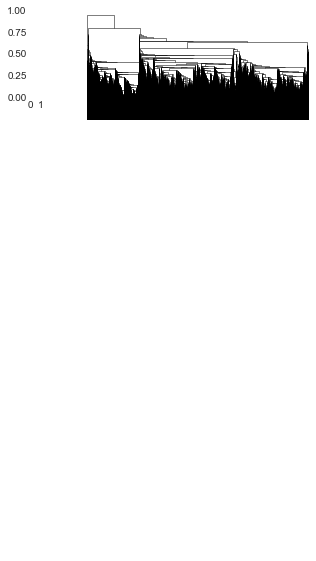

In [7]:
c = sns.clustermap(AHBA, xticklabels=False, yticklabels=False, cmap = 'RdBu_r', cbar = False,
                   row_cluster=False, col_cluster= True, figsize=(5,10))

In [ ]:
fig = plt.figure(figsize=(5, 10))
df_ahba_matrix = pd.DataFrame(AHBA).reindex(c.dendrogram_col.reordered_ind).T
sns.heatmap(df_ahba_matrix, cmap = 'RdBu_r', cbar=True, vmin = -.1, vmax =.1, 
            xticklabels=False, yticklabels=False, )
#plt.savefig(os.path.join(save_fig_dir, 'methods_plot_ahba.png'), transparent= True, bbox_inches= 'tight', dpi=200)

# PLot iron gene expression 

In [3]:
ahba_dirx         = '/Users/kanaan/SCR/Github/ENIGMA_TOURETTE/AHBA/ahba_data'
AHBA = pd.read_csv(os.path.join(ahba_dirx, 'AHBA_20737.csv'),index_col=0)
META = AHBA.iloc[:,-28:]


/Users/kanaan/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20763,20764,20765) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# Get coords for visualizing wells in 3d
df_motor  =  pd.read_csv(os.path.join(ahba_dir, 'wells_motor.csv'), index_col = 0)
df_limbic =  pd.read_csv(os.path.join(ahba_dir, 'wells_limbic.csv'), index_col = 0)
df_exec   =  pd.read_csv(os.path.join(ahba_dir, 'wells_exec.csv'), index_col = 0)


In [12]:
def return_expression_df(geneset):
    ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/'
    drop_strings = ['coords_native', 'donor_names', 'struct_id', 
                'struct_name', 'top_struct', 'Mean', 'Median', 
                'PC1', 'PC2','PC3', #'SVD1g', 'SVD2g','SVD3g', 'SVD3p', 'SVD2p','SVD3p', 
                'corrected_mni_x', 'corrected_mni_y', 'corrected_mni_z']
    df = pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0)
    gs = [i for i in df.columns if i not in drop_strings]
    return df, gs 

IRON_H,  GS_IRON_H   = return_expression_df('IRON_HOMEOSTASIS_PCA')
IRON_D,  GS_IRON_D   = return_expression_df('IRON_D_PCA')
IRON_T2, GS_IRON_T2  = return_expression_df('IRON_TRANSPORT2_PCA')
FERRITIN,GS_FERRITIN = return_expression_df('FERRITIN_PCA')
IRON_IM, GS_IRON_IM  = return_expression_df('IRON_ION_IMPORT_PCA')
IRON_T1, GS_IRON_T1  = return_expression_df('IRON_TRANSPORT1_PCA')
IRON_R,  GS_IRON_R   = return_expression_df('IRON_RESPONSE_PCA')

genesets = {'IRON_H'  : GS_IRON_H,
            'IRON_D'  : GS_IRON_D,
            'IRON_T2' : GS_IRON_T2,
            'FERRITIN': GS_FERRITIN,
            #'IRON_T1' : GS_IRON_T1,
            'IRON_IM' : GS_IRON_IM,
            'IRON_R'  : GS_IRON_R,
           }
iron_genes= GS_IRON_H+ GS_IRON_D +GS_IRON_T2 + GS_IRON_R

def plot_str3_ahba(str_mask, cmap ):
    
    if str_mask == 'motor':
        wells = df_motor.index
    elif str_mask == 'limbic':
        wells = df_limbic.index
    elif str_mask == 'exec': 
        wells = df_exec.index
    
    
    # plot AHBA whole brain data for some genes
    drop_cols = [i for i in AHBA.columns if i not in iron_genes if i in AHBA.columns]
    df = AHBA.drop(drop_cols, axis =1)
    df = df.drop([i for i in df.index if i not in wells], axis = 0 )
    
    #scale data
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)

    #df["top_struct"] = df["top_struct"] / 10
    fig = plt.figure(figsize=(5, 10))
    sns.heatmap(df, cmap = cmap, xticklabels=False, yticklabels=False, cbar=False,vmin=0,vmax=1)
    fig.savefig(os.path.join(save_fig_dir, 'methods_iron_genes_%s.png'%str_mask), bbox_inches = 'tight', transparent = True)


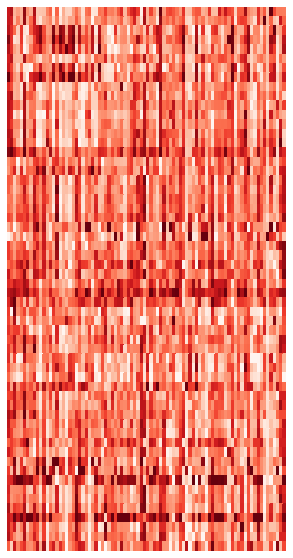

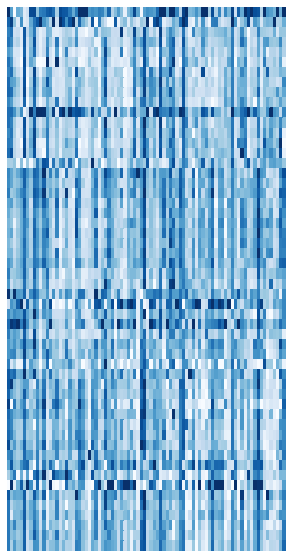

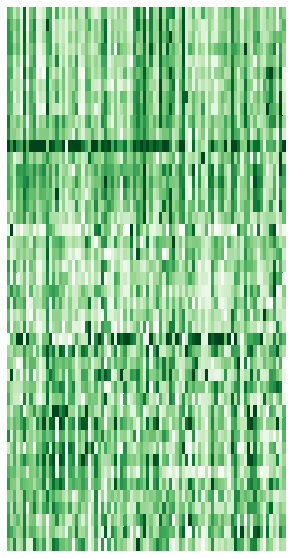

In [13]:
plot_str3_ahba('motor', 'Reds')
plot_str3_ahba('exec', 'Blues')
plot_str3_ahba('limbic', 'Greens')


# plot decomposed iron-related gene expression 

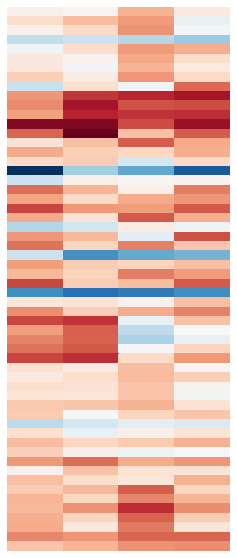

In [145]:

gsets = [IRON_H, IRON_D, IRON_T2, FERRITIN]

def return_str_iron_gene_df(df_str, gsets):
    
    drop_index = [i for i in gsets[0].index if i not in df_str.index]
    
    iron_means = []
    for df in gsets:
        df = df.drop(drop_index,axis=0)
        iron_means.append(df.Mean)
    return pd.DataFrame(iron_means, index=['IRON','IRON_D','IRON_T2','FERRITIN']).T
                             
mot = return_str_iron_gene_df(df_motor, gsets)

# Get coords for visualizing wells in 3d
df = mot
#df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df))
df = pd.DataFrame(df)
fig = plt.figure(figsize=(4, 10))
sns.heatmap(preprocessing.scale(df), cmap = 'RdBu_r', cbar=0)
plt.xticks([])
plt.yticks([])
plt.savefig('%s/methods_iron_gsets.png' %(save_fig_dir), dpi = 300, transparent = True, bbox_inches='tight')


# STATISTICAL INFERENCE PLOTS 

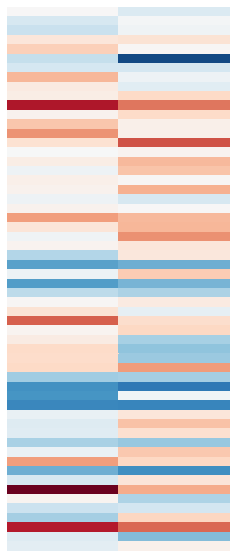

In [142]:
# Get coords for visualizing wells in 3d
df = df_motor
#df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df))
df = pd.DataFrame(df)
fig = plt.figure(figsize=(4, 10))
sns.heatmap(preprocessing.scale(df), cmap = 'RdBu_r', cbar=0,vmin=-3,vmax=3)
plt.xticks([])
plt.yticks([])

plt.savefig('%s/methods_iron_gene_tstat.png' %(save_fig_dir), dpi = 300, transparent = True, bbox_inches='tight')


['PHF20L1',
 'KIAA1644',
 'FAM108A4P',
 'DYNLRB2',
 'ZNF704',
 'RP11-115C21.2',
 'SLC5A10',
 'PAX5',
 'LOC100290448',
 'BOD1L',
 'ASCL1',
 'C3orf52',
 'MESDC1',
 'MTMR10',
 'CTH',
 'C19orf42',
 'ZFP2',
 'TTLL6',
 'C10orf82',
 'CENPI',
 'BTBD16',
 'ABP1',
 'COLEC10',
 'C18orf56',
 'PDGFA',
 'HDX']

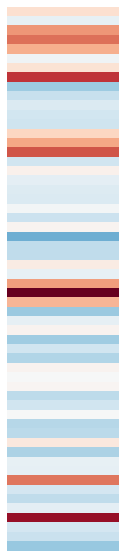

In [143]:
# random sample
import random 
random_genes = random.sample(AHBA.columns, 26)

# Get coords for visualizing wells in 3d
df = df_motor
#create df 
df_random_sample = AHBA.drop([i for i in AHBA.columns if i not in random_genes],axis=1)
df_random_sample = df_random_sample.drop([i for i in df_random_sample.index if i not in df_motor.index])
df_random_sample_mu = preprocessing.scale(df_random_sample.T.mean())

fig = plt.figure(figsize=(2, 10))
sns.heatmap(pd.DataFrame(df_random_sample_mu), cmap = 'RdBu_r', cbar=0,vmin=-3,vmax=3)
plt.xticks([])
plt.yticks([])

plt.savefig('%s/methods_iron_gene_random.png' %(save_fig_dir), dpi = 300, transparent = True, bbox_inches='tight')
